### Binning 

- Process of transforming continuous variables into discrete variables by creating set of intervals.

- For eg : In age features there are multiple values available , then create bins same which histogram does.


### Why to use Binning

- To handle Outliers
- To improve the value spread


### Types of Binning

- Custom Binning



- Supervised Binning : 

        1.Decision Tree Binning

- Unsupervised Binning :

        1.Equal width / Uniform Binning 

        2.Equal Frequency / Quantile Binning 

        3.Kmeans Binning


### Equal Width / Uniform Binning

- Same as histogram
- Equal bins will be created.
- Formula = max-min/bins 


### Equal Frequency / Quantile Binning

- Intervals / Bins = 10
- Each interval contains 10% of total observations
- Contains 10% observation = 10%quantile.


### Binarization

- Continuous values is converted into binary (0 and 1)
- Eg : If annual income is greater than 6L , then tax = True else False.

- Used in image processing if pixel values if greater than 127.5 then 1 else 0.



### Binning / Discretization 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day32-binning-and-binarization\\train.csv",usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [4]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(714, 3)

### Without applying binning , check the accuracy 

In [6]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [7]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6643356643356644

In [8]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6330985915492958

### After appplying binning , check the accuracy 

In [53]:

# Feature age and fare are having many values thus we will create bins.
# and after that check the accuracy whether it is changing or not.

kbin_age=KBinsDiscretizer(n_bins=17,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=17,encode='ordinal',strategy='kmeans')



In [54]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1]),
])

In [55]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)


In [56]:
# no of bins created , we can check that.

trf.named_transformers_['second'].n_bins_

array([17])

In [57]:
trf.named_transformers_['first'].n_bins_

array([17])

In [58]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  5.2552521 , 10.80357143, 15.63655462, 19.71210407,
              23.82592147, 28.23562047, 32.70932679, 37.42526882, 42.38494624,
              47.2016129 , 51.69117647, 56.44117647, 61.3       , 67.05      ,
              72.25      , 77.        , 80.        ])                         ],
      dtype=object)

In [59]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [60]:
output['age_labels']=pd.cut(x=X_train['Age'],
                           bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
                           
output['fare_labels']=pd.cut(x=X_train['Fare'],
                           bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
                                               

In [61]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
677,18.00,3.0,9.8417,0.0,"(15.637, 19.712]","(0.0, 11.772]"
722,34.00,7.0,13.0000,1.0,"(32.709, 37.425]","(11.772, 21.369]"
591,52.00,11.0,78.2667,8.0,"(51.691, 56.441]","(75.685, 84.695]"
491,21.00,4.0,7.2500,0.0,"(19.712, 23.826]","(0.0, 11.772]"
164,1.00,0.0,39.6875,3.0,"(0.42, 5.255]","(32.632, 44.14]"
...,...,...,...,...,...,...
823,27.00,5.0,12.4750,1.0,"(23.826, 28.236]","(11.772, 21.369]"
319,40.00,8.0,134.5000,11.0,"(37.425, 42.385]","(123.806, 144.756]"
806,39.00,8.0,0.0000,0.0,"(37.425, 42.385]",NaN
312,26.00,5.0,26.0000,2.0,"(23.826, 28.236]","(21.369, 32.632]"


In [62]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6853146853146853

In [63]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.645735524256651

In [77]:
def discretize(bins,strategy):
    
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1]),
    ])
    
    X_trf=trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color="red")
    plt.title("After")
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color="red")
    plt.title("After")
    
    plt.show()
        

0.6456964006259781


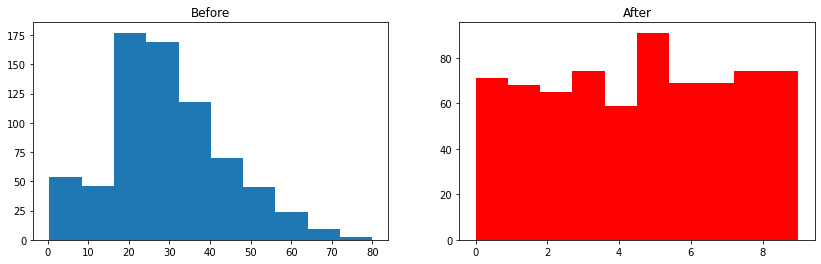

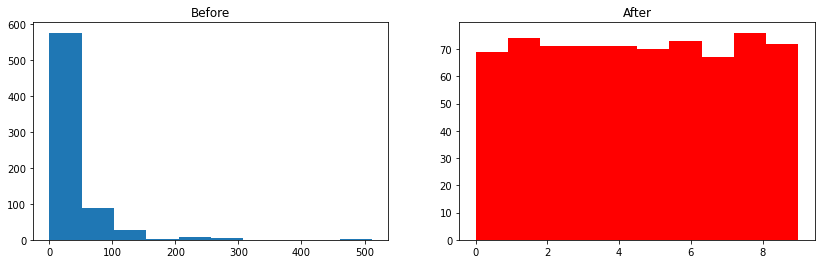

In [78]:
discretize(10,'quantile')

### Binarization

- Continuous values is converted into binary (0 and 1)
- Eg : If annual income is greater than 6L , then tax = True else False.

- Used in image processing if pixel values if greater than 127.5 then 1 else 0.


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [26]:
df=pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day32-binning-and-binarization\\train.csv",usecols=['Age','Fare','SibSp','Parch','Survived'])
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [27]:
df.dropna(inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [28]:
df['family']=df['SibSp']+df['Parch']
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [29]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [30]:
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


### Without Binarization 

In [31]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3)


In [32]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.6503496503496503

In [33]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy'))

0.6498473357628287

### With Binarization

In [34]:

# to check whether passenger is travelling alone or not.
# 0 - alone , 1- not alone.

from sklearn.preprocessing import Binarizer

trf=ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [37]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,0.0,18.00,9.8417
1,0.0,34.00,13.0000
2,1.0,52.00,78.2667
3,0.0,21.00,7.2500
4,1.0,1.00,39.6875
...,...,...,...
566,1.0,27.00,12.4750
567,1.0,40.00,134.5000
568,0.0,39.00,0.0000
569,1.0,26.00,26.0000


In [36]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_predict=clf.predict(X_test_trf)
accuracy_score(y_test,y_predict)


0.6153846153846154

In [38]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy'))

0.6190682556879741

### THE END 